<h1><center>Predviđanje moždanog udara</center></h1>

<img src="image.jpg" width="500" height="500"> 


### Uvod u problematiku
Prema podacima svjetske zdrastvene organizacije (eng. WHO), moždani udar je drugi najučestaliji uzročnik smrti, odgovoran za čak 11% svih smrtnih slučajeva čovječanstva. Iako ulogu svakako igraju genetske predispozicije, najbitniji faktor je način života. Ovaj esej posvećen je analizi i predviđanju faktora koji utječu na mogućnost dobivanja moždanog udara na osnovi podataka preuzetih s "https://www.kaggle.com".
### Učitavanje podataka

In [12]:
import pandas as pd
import numpy as np
podaci = pd.read_csv('podaci.csv', encoding='utf-8')
print(podaci.shape)
print(podaci.info())

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


### Sređivanje podataka

In [25]:
podaci.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Za potrebe ovog eseja, stupac id koji sadrži jedinstvene identifikacijske oznake pacijenta nam je nepotreban pa ćemo njega maknuti. Koristeći se dokumentacijom, ostala imena stupaca i varijabla opisujemo u nastavku. 

1) **gender**: spol pacijenta, može biti "Male", "Female" or "Other" <br>
2) **age**: starost pacijenta <br>
3) **hypertension**: 0 ako pacijent nije imao hipertenziju, 1 ako jest <br>
4) **heart_disease**: 0 ako pacijent nije imao nikakvu srčanu bolest, 1 ako jest <br>
5) **ever_married**: bračni status pacijenta, može biti "No" or "Yes" <br>
6) **work_type**: tip posla, može biti "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
7) **Residence_type**: mjesto stanovanja, može biti "Rural" or "Urban" <br>
8) **avg_glucose_level**: prosječna razina glukoze u krvi  <br>
9) **bmi**: indeks tjelesne mase <br>
10) **smoking_status**: može biti "formerly smoked", "never smoked", "smokes" or "Unknown"* <br>
11) **stroke**: 1 ako je pacijent imao moždani udar ili 0 ako nije <br>
*"Unknown" kod smoking_status znači da je ta informacija nedostupna za pacijenta*

Vidimo da u koloni "smoking_status" imamo nedostajuće informacije, pa ćemo te vrijednosti zamjeniti sa Nan. Također uočavamo da se podaci sastoje od sedam kategorijskih varijabla i tri neprekidne, numeričke varijable.

In [18]:
podaci = podaci.drop('id', axis=1)
podaci.replace('Unknown', np.NaN) 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Analiza pojedinih čimbenika na moždani udar

### Godine

Pitanje koje se prvo nameće su godine pacijenata. Najstariji pacijent ima 82 godine, dok najmlađi ima manje od godinu dana. Hipoteza je da što je pacijent stariji, to je vjerojatnost umiranja od moždanog udara veća. Provjerimo kako se ta pretpostavka uklapa u naše podatka.

In [27]:
podaci[['age']].describe()

,age
count,5110.000000
mean,43.226614
std,22.612647
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


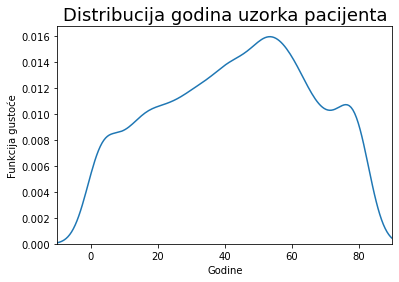

In [62]:
import matplotlib.pyplot as plt #paket za crtanje
import seaborn as sns  #isto paket za crtanje

plt.xlim(-10,90)
plt.title('Distribucija godina uzorka pacijenta', fontsize= 18)
plt.xlabel('Godine')
plt.ylabel('Funkcija gustoće')
sns.kdeplot(podaci['age'])

plt.title('Distribucija godina uzorka pacijenta', fontsize= 18)

plt.show() #prikaz grafa

In [63]:
mozdani = podaci[podaci['stroke']==1]['age'].fillna(0.0).astype(float)
bez_mozdanog = podaci[podaci['stroke']==0]['age'].fillna(0.0).astype(float)
fig = ff.create_distplot([mozdani, bez_mozdanog], ['Moždani','Ne moždani'], 
                         bin_size=0.78, curve_type='normal'
                        ,colors =  ['#0260E8','#E20338'])
#naslov grafa i x os
fig.update_layout(
    title="Distribucija moždanog udara kroz godine",
    xaxis_title="Godine",
)

fig.show() #prikaz grafa

### Prosječne razina glukoze u krvi

Prema dostupnim medicinskim podacima, normalnom razinom glukoze u krvi kod ljudi smatramo interval između 70 mg/dl i 126 mg/dl. 

In [28]:
podaci[['avg_glucose_level']].describe()

,avg_glucose_level
count,5110.000000
mean,106.147677
std,45.283560
min,55.120000
25%,77.245000
50%,91.885000
75%,114.090000
max,271.740000


Prosječna razina glukoze u krvi našeg uzorka je 106.148, što upada u "normalni" interval.

### Indeks tjelesne težine (BMI)

Prema "Adult BMI kalkulatoru", osobe s BMI vrijednosti u intervalu 18.5 - 24.9 smatraju se zdrave.

In [29]:
podaci[['bmi']].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


Prosječna vrijednost indeksa tjelesne težine našeg uzorka pacijenta je 28.893. 

### Literatura
https://medlineplus.gov/ency/patientinstructions/000966.htm
https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

## Paketi koje sam dodatno instalirala preko terminala
ploty
